# Radial Basis Function (Gaussian) Network

### Tasks:
1) Play with n_rbf and sigma until a satisfactory function approximation is achieved.

2) To simulate sampled data instead of a mathematical function, add random noise to my_fun(x)


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  6 12:33:08 2022

@author: Raphael
"""

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# My function
x_start = 0
x_end = 10
n_eval = 100

def my_fun(x):
    return np.sin(x) #+ np.random.rand(len(x))*0.1

x_eval = np.linspace(x_start, x_end, n_eval)
y = my_fun(x_eval)

In [3]:
# RBF parameters
n_rbf = 10
sigma = 3
centers = np.linspace(x_start, x_end, n_rbf)

In [4]:
# Gaussian kernel
def rbf_gaussian(x, mu, sigma):
    return np.exp(-(x-mu)**2/2*sigma**2)

# Matrix of each RBF for each point in x (rows=len(x), columns=n_rbf)
def interpolation_matrix(x):
    g = np.empty((len(x), n_rbf))
    for i in range(len(x)):
        g[i,:] = rbf_gaussian(x[i], centers, sigma)
    return g
        
# Compute weights by least squares (minimize error at RBF centers)
inverse_im = np.linalg.pinv(interpolation_matrix(centers))
weights = np.dot(inverse_im, my_fun(centers))

# Evaluate for centers and x_eval
y_approx = np.dot(interpolation_matrix(x_eval), weights)
rbfs = interpolation_matrix(x_eval)*weights

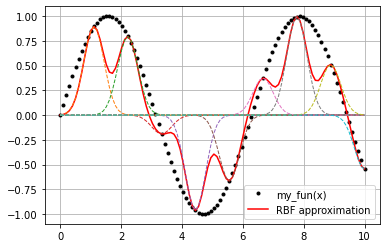

In [6]:
# Plot
plt.plot(x_eval, y, 'k.')
plt.plot(x_eval, y_approx, 'r')
plt.plot(x_eval, rbfs, '--', linewidth=1)
plt.grid()
plt.legend(['my_fun(x)', 'RBF approximation'])
# plt.rcParams['figure.dpi'] = 300
